In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score

# **LINEAR-REGRESSION**

In [ ]:
X,y=datasets.make_regression(n_samples=500,n_features=1,noise=30,random_state=50)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
y.shape

(1000,)

In [ ]:
X.shape

(1000, 1)

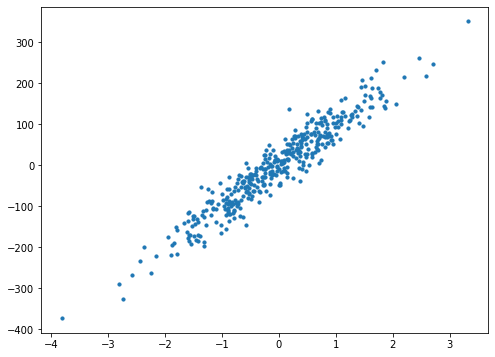

In [ ]:
fig=plt.figure(figsize=(8,6))
cmap=plt.get_cmap('viridis')
plt.scatter(X_train,y_train,s=10,cmap='b')
plt.show()

In [ ]:
class LinearRegression():
  def __init__(self,lr=0.01,n_iters=5000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0

    for i in range(self.n_iters):
      y_pred=np.dot(X,self.weights)+self.bias

      dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
      db=(1/n_samples)*np.sum(y_pred-y)

      self.weights-=dw*self.lr
      self.bias-=db*self.lr

  def predict(self,X):
    return np.dot(X,self.weights)+self.bias

In [ ]:
def mean_squared_error(y_test,y_pred):
  return np.mean((y_pred-y_test)**2)

In [ ]:
reg=LinearRegression(0.01,100000)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)


In [ ]:
print(pd.DataFrame(y_test,pred))

                      0
-115.519719 -100.653291
-141.608570 -134.511941
 15.144203    24.286159
 7.674610     13.192207
 101.169698   70.748697
...                 ...
 109.571929  165.677081
 89.383157    73.433464
-39.439558    -0.302581
 2.492204    -30.617359
-37.397724   -71.828979

[100 rows x 1 columns]


In [ ]:
mse=mean_squared_error(y_test,pred)
print(mse)

902.4777914529416


In [ ]:
acc=r2_score(pred,y_test)
print(acc)

0.887494590421421


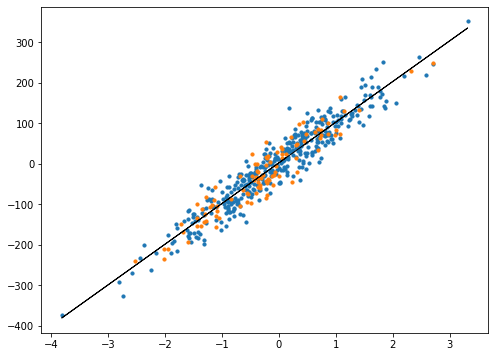

In [ ]:
fig=plt.figure(figsize=(8,6))
cmap=plt.get_cmap('viridis')
m1=plt.scatter(X_train,y_train,s=10,cmap='b')
m2=plt.scatter(X_test,y_test,s=10,cmap='r')
y_line=reg.predict(X)
plt.plot(X,y_line,color='black',linewidth=1)
plt.show()

# **LOGISTIC REGRESIION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
class LogRegression():
  def __init__(self,lr=0.001,n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None
  

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0

    for i in range(self.n_iters):
      linear=np.dot(X,self.weights)+self.bias
      y_pred=self._sigmoid(linear)

      dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
      db=(1/n_samples)*np.sum(y_pred-y)

      self.weights-=self.lr*dw
      self.bias-=self.lr*db

  
  def predict(self,X):
    linear=np.dot(X,self.weights)+self.bias
    y_pred=self._sigmoid(linear)
    y_class=[1 if i>0.5 else 0 for i in y_pred]

    return np.array(y_class)
  
  def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [ ]:
bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
def acc(y_pred,y):
  return np.mean((y_pred==y))

In [ ]:
reg=LogRegression(lr=0.0001,n_iters=5000)
reg.fit(X_train,y_train)

pred=reg.predict(X_test)

ac=acc(pred,y_test)
print(ac)

0.9298245614035088


In [ ]:
print(np.count_nonzero(y_test==1),np.count_nonzero(pred==1))

69 71


# **SVM**

In [ ]:
class SVM():
  def __init__(self,lr=0.001,lambda_param=0.01,n_iters=1000):
    self.lr=lr
    self.lambda_param=lambda_param
    self.n_iters=n_iters
    self.w=None
    self.b=None

  def fit(self,X,y):
    n_samples,n_features=X.shape
    self.w=np.zeros(n_features)
    self.b=0

    y_=np.where(y<=0,1,-1)

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
          condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
          if condition:
              self.w -= self.lr * (2 * self.lambda_param * self.w)
          else:
              self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])  )
              self.b -= self.lr * y_[idx]

  
  def predict(self,X):
    return np.sign(np.dot(X,self.w)-self.b)

In [ ]:
X,y=datasets.make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
y=np.where(y==0,1,-1)
X.shape


(50, 2)

In [ ]:
clf = SVM()
clf.fit(X, y)

pred=clf.predict(X)

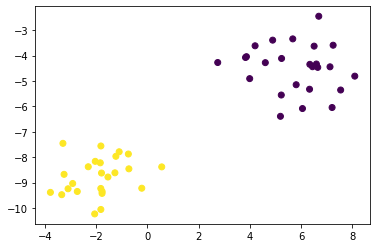

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.scatter(X[:,0],X[:,1],marker="o",c=y)

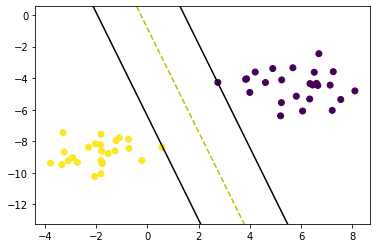

In [ ]:
#to plot
def visualise():
  def hyperplane(x,w,b,offset):
    return (-w[0]*x+b+offset)/w[1]

  fig=plt.figure()
  ax=fig.add_subplot(1,1,1)
  plt.scatter(X[:,0],X[:,1],marker="o",c=y)

  #get the margin values
  x01=np.amin(X[:,0])
  x02=np.amax(X[:,0])

  #central line
  x11=hyperplane(x01,clf.w,clf.b,0)
  x12=hyperplane(x02,clf.w,clf.b,0)

  #for -ve class
  xm1=hyperplane(x01,clf.w,clf.b,-1)
  xm2=hyperplane(x02,clf.w,clf.b,-1)

  #for +ve class
  xp1=hyperplane(x01,clf.w,clf.b,1)
  xp2=hyperplane(x02,clf.w,clf.b,1)

  ax.plot([x01,x02],[x11,x12],"y--")
  ax.plot([x01,x02],[xm1,xm2],"k")
  ax.plot([x01,x02],[xp1,xp2],"k")

  x1_min=np.amin(X[:,1])
  x1_max=np.amax(X[:,1])

  ax.set_ylim([x1_min-3,x1_max+3])

  plt.show()

visualise()

# **PCA**

(150, 4)
(150, 2)


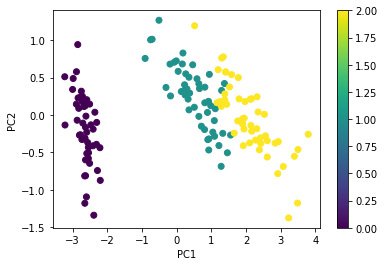

In [ ]:
# mean, cov, eigen, sort, k comp, project
class PCA:
  def __init__(self,k):
    self.k=k
    self.comp=None
    self.mean=None

  def fit(self,X):
    self.mean=np.mean(X,axis=0)
    X=X-self.mean

    cov=np.cov(X.T)

    eval,evec=np.linalg.eig(cov)

    evec=evec.T

    idx=np.argsort(eval)[::-1]
    eval=eval[idx]
    evec=evec[idx]

    self.comp=evec[0:self.k]
    
  def transform(self,X):
    X=X-self.mean
    return np.dot(X,self.comp.T)

d=datasets.load_iris()
X,y=d.data,d.target
pca=PCA(2)
pca.fit(X)
pred=pca.transform(X)

print(X.shape)
print(pred.shape)

x11=pred[:,0]
x12=pred[:,1]
plt.scatter(x11,x12,c=y,alpha=0.8)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar()
plt.show()

# **LDA**

In [ ]:
class LDA:
  def __init__(self,k):
    self.k=k
    self.comp=None

  def fit(self,X,y):
    # class labels, sw,sb,eigen
    mean=np.mean(X,axis=0)
    class_labels=np.unique(y)
    n_features=X.shape[1]

    sw=np.zeros((n_features,n_features))
    sb=np.zeros((n_features,n_features))

    for c in class_labels:
      x_c=X[y==c]
      mean_c=np.mean(x_c,axis=0)

      sw+=(x_c-mean_c).T.dot(x_c-mean_c)
      
      n_c=x_c.shape[0]
      mean_diff=(mean_c-mean).reshape(n_features,1)
      sb+=n_c*(mean_diff).dot(mean_diff.T)
  

    a=np.linalg.inv(sw).dot(sb)

    eval,evec=np.linalg.eig(a)
    evec=evec.T

    idx=np.argsort(abs(eval))[::-1]
    eval=eval[idx]
    evec=evec[idx]

    self.comp=evec[0:self.k]
  

  def transform(self,X):
    return np.dot(X,self.comp.T)

(150, 4)
(150, 2)


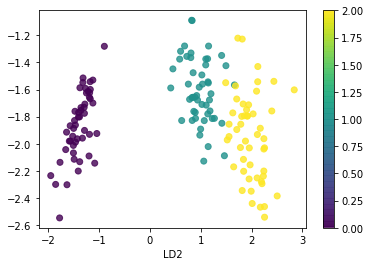

In [ ]:
d=datasets.load_iris()
X,y=d.data,d.target

lda=LDA(2)
lda.fit(X,y)
pred=lda.transform(X)

print(X.shape)
print(pred.shape)

x1=pred[:,0]
x2=pred[:,1]

plt.scatter(x1,x2,c=y,alpha=0.8)
plt.xlabel("LD1")
plt.xlabel("LD2")
plt.colorbar()
plt.show()

# **BACK PROPAGATION**

In [ ]:
class FCLayer:
  def __init__(self,input_size,output_size):
    self.input_size=input_size
    self.output_size=output_size
    self.w=np.random.randn(self.input_size,self.output_size)-0.5
    self.b=np.random.randn(1,self.output_size)-0.5
  
  def forward_propagation(self,X):
    self.input=X
    self.output=np.dot(self.input,self.w)+self.b
    return self.output
  
  def backward_propagation(self,output_error,lr): # de/dw=y*w de/dx=w*y de/db=y
    input_error=np.dot(output_error,self.w.T)
    weight_error=np.dot(self.input.T,output_error)

    self.w-=lr*weight_error
    self.b-=lr*output_error
    return input_error

class ActivationLayer:
  def __init__(self,ac,acp):
    self.ac=ac
    self.acp=acp
  
  def forward_propagation(self,X):
    self.input=X
    self.output=self.ac(self.input)
    return self.output
  
  def backward_propagation(self,output_error,lr):
    return output_error*self.acp(self.input)


def tanh(x):
  return np.tanh(x)

def tanhp(x):
  return 1-np.tanh(x)**2

def mse(y,y_pred):
  return np.mean(np.power(y-y_pred,2))

def msep(y,y_pred):
  return 2*(y_pred-y)/y.size

In [ ]:
x_train=np.array([[[0,0]],[[0,1]],[[1,0]],[[1,1]]])
y_train=np.array([[[0]],[[1]],[[1]],[[0]]])

network=[
    FCLayer(2,3),
    ActivationLayer(tanh,tanhp),
    FCLayer(3,1),
    ActivationLayer(tanh,tanhp)
]

epochs=1000
lr=0.1

for i in range(epochs):
  error=0
  for j in range(len(x_train)):
    output=x_train[j]
    for layer in network:#fp
      output=layer.forward_propagation(output)

    #error
    error+=mse(y_train[j],output)
    output_error=msep(y_train[j],output)

    for layer in reversed(network):#bp
      output_error=layer.backward_propagation(output_error,lr)

  error/=len(x_train)
  print(i+1," / ",epochs," ",error)

1  /  1000   0.6778275194194163
2  /  1000   0.2717973723819179
3  /  1000   0.24208262305800254
4  /  1000   0.24012953769773626
5  /  1000   0.23981586205860966
6  /  1000   0.23950361278169657
7  /  1000   0.23918226247481064
8  /  1000   0.23885383663861567
9  /  1000   0.23851840252240733
10  /  1000   0.23817575305968613
11  /  1000   0.23782569372685095
12  /  1000   0.23746808463932903
13  /  1000   0.2371028493202732
14  /  1000   0.2367299792751121
15  /  1000   0.23634953821753713
16  /  1000   0.23596166631567025
17  /  1000   0.2355665843198696
18  /  1000   0.2351645973386679
19  /  1000   0.23475609799420505
20  /  1000   0.2343415686655334
21  /  1000   0.2339215825133061
22  /  1000   0.23349680297520403
23  /  1000   0.2330679814317132
24  /  1000   0.23263595277018143
25  /  1000   0.23220162862450602
26  /  1000   0.23176598814022956
27  /  1000   0.23133006621040933
28  /  1000   0.23089493924430615
29  /  1000   0.23046170866398974
30  /  1000   0.2300314824659436

In [ ]:
result=[]

for i in range(len(x_train)):
  output=x_train[i]
  for layer in network:
    output=layer.forward_propagation(output)
  result.append(output)

result

[array([[-0.01034575]]),
 array([[0.97636602]]),
 array([[0.97625251]]),
 array([[-0.08144865]])]

# **GMM**

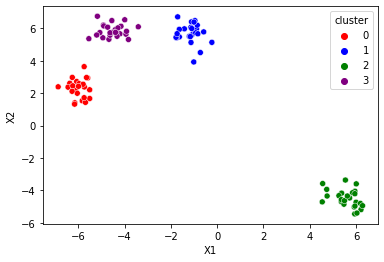

In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns

X,y=datasets.make_blobs(n_samples=100,centers=4,cluster_std=0.5,random_state=1234)
data=pd.DataFrame(X)
data.columns=['X1','X2']
data['cluster']=y


plt.figure(figsize=(6,4))
sns.scatterplot(data=data, 
                x="X1",
                y="X2", 
                hue="cluster",
                palette=["red","blue","green", "purple"])


In [ ]:
gmm=GaussianMixture(covariance_type="full",n_components=3).fit(X)
gmm.means_

array([[-6.0092843 ,  2.29097124],
       [ 5.60232656, -4.50487241],
       [-2.8272913 ,  5.77555544]])

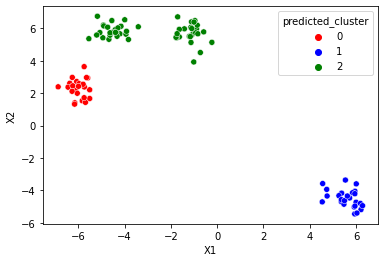

In [ ]:
labels = gmm.predict(X)
data["predicted_cluster"]=labels
sns.scatterplot(data=data, 
                x="X1",
                y="X2", 
                hue="predicted_cluster",
                palette=["red","blue","green"])

# **RBFN**

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

In [1]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, y)

print(gpc.score(X, y))

gpc.predict_proba(X[:2,:])

0.9866666666666667


array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])

In [3]:
X[1]

array([4.9, 3. , 1.4, 0.2])

# **MDP**
https://medium.com/@ngao7/markov-decision-process-value-iteration-2d161d50a6ff


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class ValueIteration:
    def __init__(self, reward_function, transition_model, gamma):
        self.num_states = transition_model.shape[0]
        self.num_actions = transition_model.shape[1]
        self.reward_function = np.nan_to_num(reward_function)
        self.transition_model = transition_model
        self.gamma = gamma
        self.values = np.zeros(self.num_states)
        self.policy = None

    def one_iteration(self):
        delta = 0
        for s in range(self.num_states):
            temp = self.values[s]
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            self.values[s] = max(v_list)
            delta = max(delta, abs(temp - self.values[s]))
        return delta

    def get_policy(self):
        pi = np.ones(self.num_states) * -1
        for s in range(self.num_states):
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            max_index = []
            max_val = np.max(v_list)
            for a in range(self.num_actions):
                if v_list[a] == max_val:
                    max_index.append(a)
            pi[s] = np.random.choice(max_index)
        return pi.astype(int)

    def train(self, tol=1e-3):
        epoch = 0
        delta = self.one_iteration()
        delta_history = [delta]
        while delta > tol:
            epoch += 1
            delta = self.one_iteration()
            delta_history.append(delta)
            if delta < tol:
                break
        self.policy = self.get_policy()

        print(f'# iterations of policy improvement: {len(delta_history)}')
        print(f'delta = {delta_history}')

        fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
        ax.plot(np.arange(len(delta_history)) + 1, delta_history, marker='o', markersize=4,
                alpha=0.7, color='#2ca02c', label=r'$\gamma= $' + f'{self.gamma}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Delta')
        ax.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from time import time


class GridWorld:
    def __init__(self, filename, reward, random_rate, time_limit=1000):
        file = open(filename)
        self.map = np.array(
            [list(map(float, s.strip().split(","))) for s in file.readlines()]
        )
        file.close()
        self.num_rows = self.map.shape[0]
        self.num_cols = self.map.shape[1]
        self.num_states = self.num_rows * self.num_cols
        self.num_actions = 4
        self.reward = reward
        self.random_rate = random_rate
        self.time_limit = time_limit
        self.reward_function = self.get_reward_function()
        self.transition_model = self.get_transition_model()

    def get_state_from_pos(self, pos):
        return pos[0] * self.num_cols + pos[1]

    def get_pos_from_state(self, state):
        return state // self.num_cols, state % self.num_cols

    def get_reward_function(self):
        reward_table = np.zeros(self.num_states)
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                reward_table[s] = self.reward[self.map[r, c]]
        return reward_table

    def get_transition_model(self):
        transition_model = np.zeros((self.num_states, self.num_actions, self.num_states))
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                neighbor_s = np.zeros(self.num_actions)
                if self.map[r, c] == 0:
                    for a in range(self.num_actions):
                        new_r, new_c = r, c
                        if a == 0:
                            new_r = max(r - 1, 0)
                        elif a == 1:
                            new_c = min(c + 1, self.num_cols - 1)
                        elif a == 2:
                            new_r = min(r + 1, self.num_rows - 1)
                        elif a == 3:
                            new_c = max(c - 1, 0)
                        if self.map[new_r, new_c] == 3:
                            new_r, new_c = r, c
                        s_prime = self.get_state_from_pos((new_r, new_c))
                        neighbor_s[a] = s_prime
                else:
                    neighbor_s = np.ones(self.num_actions) * s
                for a in range(self.num_actions):
                    transition_model[s, a, int(neighbor_s[a])] += 1 - self.random_rate
                    transition_model[s, a, int(neighbor_s[(a + 1) % self.num_actions])] += self.random_rate / 2.0
                    transition_model[s, a, int(neighbor_s[(a - 1) % self.num_actions])] += self.random_rate / 2.0
        return transition_model

    def generate_random_policy(self):
        return np.random.randint(self.num_actions, size=self.num_states)

    def execute_policy(self, policy, start_pos):
        s = self.get_state_from_pos(start_pos)
        r = self.reward_function[s]
        total_reward = r

        start_time = int(round(time() * 1000))
        overtime = False

        while r != self.reward[1] and r != self.reward[2]:
            s = np.random.choice(self.num_states, p=self.transition_model[s, policy[s]])
            r = self.reward_function[s]
            total_reward += r
            cur_time = int(round(time() * 1000)) - start_time
            if cur_time > self.time_limit:
                overtime = True
                break
        if overtime is True:
            return float('-inf')
        else:
            return total_reward

    def random_start_policy(self, policy, start_pos, n=100, plot=True):
        start_time = int(round(time() * 1000))
        overtime = False
        scores = np.zeros(n)
        i = 0
        while i < n:
            temp = self.execute_policy(policy=policy, start_pos=start_pos)
            print(f'i = {i} Random start result: {temp}')
            if temp > float('-inf'):
                scores[i] = temp
                i += 1
            cur_time = int(round(time() * 1000)) - start_time
            if cur_time > n * self.time_limit:
                overtime = True
                break

        print(f'max = {np.max(scores)}')
        print(f'min = {np.min(scores)}')
        print(f'mean = {np.mean(scores)}')
        print(f'std = {np.std(scores)}')

        if overtime is False and plot is True:
            bins = 100
            fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
            ax.set_xlabel('Total rewards in a single game')
            ax.set_ylabel('Frequency')
            ax.hist(scores, bins=bins, color='#1f77b4', edgecolor='black')
            plt.show()

        if overtime is True:
            print('Overtime!')
            return None
        else:
            return np.max(scores), np.min(scores), np.mean(scores)

    def blackbox_move(self, s, a):
        temp = self.transition_model[s, a]
        s_prime = np.random.choice(self.num_states, p=temp)
        r = self.reward_function[s_prime]
        return s_prime, r

    def plot_map(self, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')
        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)

        plt.tight_layout()
        plt.show()

    def plot_policy(self, policy, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')
        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)
                s = self.get_state_from_pos((i, j))
                if self.map[i, j] == 0:
                    a = policy[s]
                    symbol = ['^', '>', 'v', '<']
                    ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker=symbol[a],
                            linestyle='none', markersize=max(fig_size)*unit, color='#1f77b4')

        plt.tight_layout()
        plt.show()

    def visualize_value_policy(self, policy, values, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')

        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                s = self.get_state_from_pos((i, j))
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)
                if self.map[i, j] != 3:
                    ax.text(x + 0.5 * unit, y + 0.5 * unit, f'{values[s]:.4f}',
                            horizontalalignment='center', verticalalignment='center',
                            fontsize=max(fig_size)*unit*0.6)
                if policy is not None:
                    if self.map[i, j] == 0:
                        a = policy[s]
                        symbol = ['^', '>', 'v', '<']
                        ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker=symbol[a], alpha=0.4,
                                linestyle='none', markersize=max(fig_size)*unit, color='#1f77b4')

        plt.tight_layout()
        plt.show()





In [ ]:
problem = GridWorld('/content/world00.csv')

solver = ValueIteration(problem.reward_function, problem.transition_model, gamma=0.9)
solver.train()

problem.visualize_value_policy(policy=solver.policy, values=solver.values)
problem.random_start_policy(policy=solver.policy)

TypeError: ignored

# **EM**

https://www.kaggle.com/code/charel/learn-by-example-expectation-maximization/notebook

In [5]:
import pathlib
import pandas as pd
import numpy as n
import tensorflow as tf

dsurl="http://download.tensorflow.org/example_images/flower_photos.tgz"

datadir=tf.keras.utils.get_file('flower_photos',origin=dsurl,untar=True)
datadir=pathlib.Path(datadir)

228813984/228813984 [==============================] - 1s 0us/step


In [6]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180,180),
    batch_size=32
)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180,180),
    batch_size=32
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# **GOOGLENET**

In [15]:
Googlenet=Sequential()
model=tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

In [16]:
#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))



In [17]:
Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


92/92 [==============================] - 293s 3s/step - loss: 222.7014 - accuracy: 0.3171 - val_loss: 28.4059 - val_accuracy: 0.3256


[0.3256130814552307]

# **mobileNET**

In [ ]:
Googlenet=Sequential()
model=tf.keras.applications.MobileNet(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))

Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

# **efficientNET**

In [ ]:
Googlenet=Sequential()
model=tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))

Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

# **denseNET**

In [ ]:
Googlenet=Sequential()
model=tf.keras.applications.DenseNet121(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))

Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

# **vcgNET**

In [ ]:
Googlenet=Sequential()
model=tf.keras.applications.VCG16(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))

Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

# **resNET**

In [ ]:
Googlenet=Sequential()
model=tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180,180,3),
    classes=5,
    weights='imagenet'
)

for layer in model.layers:
  layer.trainable=False

#help(tf.keras.applications.InceptionV3)
Googlenet.add(model)
Googlenet.add(Flatten())
Googlenet.add(Dense(512,activation='relu'))
Googlenet.add(Dense(5,activation='softmax'))

Googlenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=Googlenet.fit(train_ds,validation_data=val_ds)
history.history['val_accuracy']

# **GAN**

# **RNN**

In [ ]:
help(tf.keras.layers.SimpleRNN)

In [ ]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

sample,sample_label=X_train[0],y_train[0]

def build_model():
  lstm_layer=tf.keras.layers.SimpleRNN(64,input_shape=(None,28))
  model=tf.keras.models.Sequential(
      [
          lstm_layer,
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(10)
      ]
  )
  return model

model=build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=1)

# **LSTM**

In [ ]:
help(tf.keras.layers.SimpleRNN)

In [23]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

sample,sample_label=X_train[0],y_train[0]

In [25]:
def build_model():
  lstm_layer=tf.keras.layers.LSTM(64,input_shape=(None,28))
  model=tf.keras.models.Sequential(
      [
          lstm_layer,
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(10)
      ]
  )
  return model

In [26]:
model=build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=1)

938/938 [==============================] - 24s 25ms/step - loss: 2.5352 - accuracy: 0.1906 - val_loss: 3.1435 - val_accuracy: 0.1031


# **gru**

In [34]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

sample,sample_label=X_train[0],y_train[0]

def build_model():
  lstm_layer=tf.keras.layers.GRU(64,input_shape=(None,28))
  model=tf.keras.models.Sequential(
      [
          lstm_layer,
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(10)
      ]
  )
  return model

model=build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=1)

938/938 [==============================] - 22s 21ms/step - loss: 3.3513 - accuracy: 0.1633 - val_loss: 2.9309 - val_accuracy: 0.1867


# **transformers**

In [46]:
import numpy as np
url="https://raw.githubusercontent.com/prilily/ML-LAB/main/data.csv"
df=pd.read_fwf(url)
df.to_csv('data.csv',sep='\t')